# The Effect of Demographic and Health Factors on Medical Insurance Costs

Author: Deborah Akpoguma <br>
June 2023 

## Introduction <a name="introduction"></a>
This project aims to explore a dataset containing information about individuals' gender, age, number of children, BMI, smoker status, region, and the cost of their medical insurance. By examining these variables, we can gain valuable insights into the factors that influence insurance costs and potentially identify patterns or trends within the data.

### Questions 
- How does age impact the cost of medical insurance? Are there any noticeable trends or patterns?
- Is there a correlation between BMI and the cost of insurance? How does weight status affect insurance costs?
- What role does gender play in determining insurance costs? Are there any significant differences between males and females?
- Does having children affect insurance costs? Is there a relationship between the number of children and insurance expenses?
- How does smoking status impact insurance premiums? Are smokers charged higher rates compared to non-smokers?
- Are there regional variations in insurance costs? Do different areas exhibit distinct pricing patterns?

### Target Audience 
The intended audience for this analysis includes insurance providers, actuaries, policy analysts, and researchers in the health care or insurance industries. The findings and insights from this analysis will aid in understanding the factors that contribute to medical insurance costs and may assist in decision-making, risk assessment, and policy 
 
<hr style="border:1px solid black">

## Preparing the Environment <a name="preparing-the-environment"></a>

### Importing Libraries 

In [1]:
import pandas as pd 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing CSV file into pandas DataFrame

In [2]:
df = pd.read_csv('Medical Cost Dataset.csv')

<hr style="border:1px solid black">

## Data Exploration <a name="data-exploration"></a>

Taking a look at the first and last five rows of the dataset

In [3]:
#first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#last five rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Taking a look at the summary of the dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are __1,338__ (__1,337__ excluding the header) rows and __7__ columns. The data type for each column is valid.  

<hr style="border:1px solid black">

## Data Cleaning <a name="data-cleaning"></a>

### Handling Missing Data

In [6]:
# Check for missing data in each column
missing_data = df.isnull().sum()
print(missing_data)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no missing values in each column. 

### Handling Duplicate Data

In [7]:
df.duplicated().sum()

1

There is one duplicate row in the dataset. The next step will be to view and drop the duplicate. 

In [8]:
#viewing the duplicated data, only returns the last occurence of the duplicated row 
df[df.duplicated(keep = 'last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(1337, 7)

There are now __1,337__ (__1,336__ excluding the header) rows and __7__ columns.

<hr style="border:1px solid black">

## Descriptive Statistics <a name="descriptive-statistics"></a>

### Summary Statistics 

In [11]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


<hr style="border:1px solid black">

## Exploratory Data Analysis <a name="exploratory-data-analysis"></a>

### How does age impact the cost of medical insurance? Are there any noticeable trends or patterns?

To understand the relationship between age and insurance costs, we will: 
- Visualize age distribution
- Generate a scatter plot
- Calculate the correlation coefficient
- Split the dataset into two groups and perform a t-test for significance testing

#### Visualizing age distribution

Text(0.5, 1.0, 'Distribution of Age')

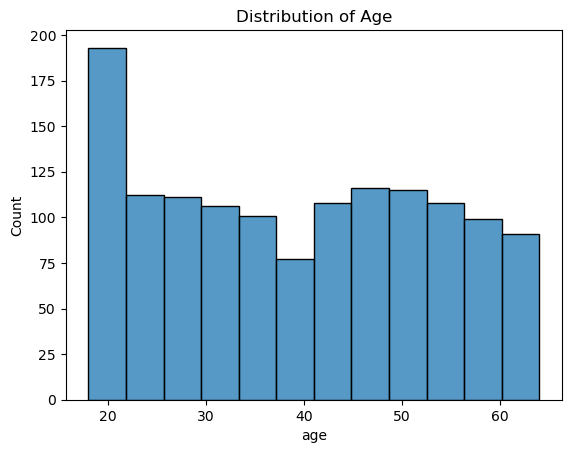

In [12]:
sns.histplot(df['age'])
plt.title ("Distribution of Age")

#### Generating Scatter Plot

Slope of the regression line: 257.22971751791476


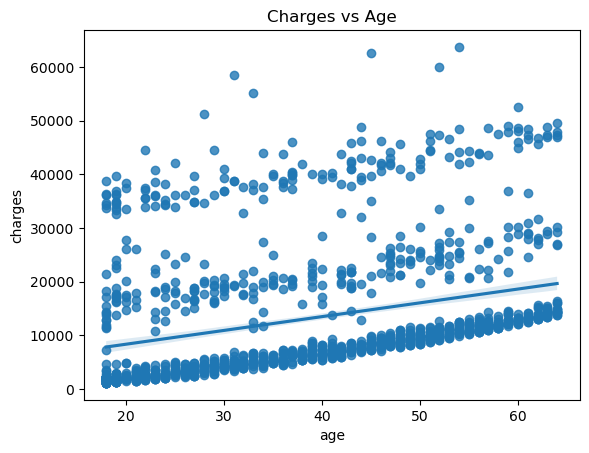

In [13]:
plt.title('Charges vs Age')
sns.regplot(x='age', y='charges', data=df, scatter=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df["age"], y=df["charges"])
print("Slope of the regression line:", slope)

#### Calculating the Correlation Coefficient - Age and Charges

In [14]:
correlation_age = df["age"].corr(df["charges"])
correlation_age 

0.2983082125097864

#### Splitting the dataset into two groups and performing a t-test for significance testing

We will begin by splitting the dataset into two groups: age_below_median and age_above_median.

__Null Hypothesis__: There is no difference in medical insurance costs between both age groups. <br>
__Alternative Hypothesis__: There is a difference in medical insurance costs between both age groups. 

In [15]:
print ("The median age for this sample is:",df["age"].median(),"years")

age_below_median = df[df["age"] < df["age"].median()]["charges"]
age_above_median = df[df["age"] >= df["age"].median()]["charges"]
t_stat, p_value = stats.ttest_ind(age_below_median, age_above_median)

print ('The t statistic is:', round(t_stat,4))
print ('The P-value is:', p_value)

The median age for this sample is: 39.0 years
The t statistic is: -9.5973
The P-value is: 3.876066121115055e-21


With such a low __p-value__, it is reasonable to reject the null hypothesis and conclude that there are differences in medical insurance costs. Since the __p-value__ is smaller than the commonly used significance level of 0.05 (or 5%), we can conclude that the observed difference in charges between the two age groups is statistically significant. 

### Is there a correlation between BMI and the cost of insurance? How does weight status affect insurance costs?

To understand the relationship between BMI and insurance costs, we will: 
- Visualize BMI distribution 
- Calculate the correlation coefficient
- Create BMI categories
- Compare average medical insurance cost between BMI categories
- Test for the significance of the differences in costs between BMI categories

#### Visualizing BMI Distribution

Text(0.5, 1.0, 'Distribution of BMI')

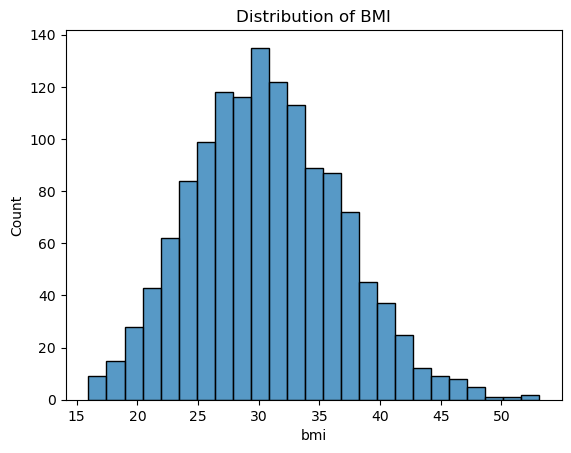

In [16]:
sns.histplot(df['bmi'])
plt.title ("Distribution of BMI")

#### Calculating the Correlation Coefficient - BMI and Charges

In [17]:
correlation_bmi = df["bmi"].corr(df["charges"])
correlation_bmi

0.19840083122624938

#### Creating BMI Categories 

In [18]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, float('inf')],
labels=["Underweight", "Normal weight", "Overweight", "Obese"])

#### Comparing average medical insurance cost between BMI categories

In [19]:
bmi_groups = pd.DataFrame (df.groupby("bmi_category")["charges"].mean())
bmi_groups.rename(columns={'charges': 'average_cost'}, inplace=True)
bmi_groups['average_cost'] = bmi_groups['average_cost'].map('${:,.2f}'.format)
bmi_groups

,average_cost
bmi_category,
Underweight,"$8,657.62"
Normal weight,"$10,404.90"
Overweight,"$11,006.81"
Obese,"$15,510.92"


Text(0, 0.5, 'Average Cost')

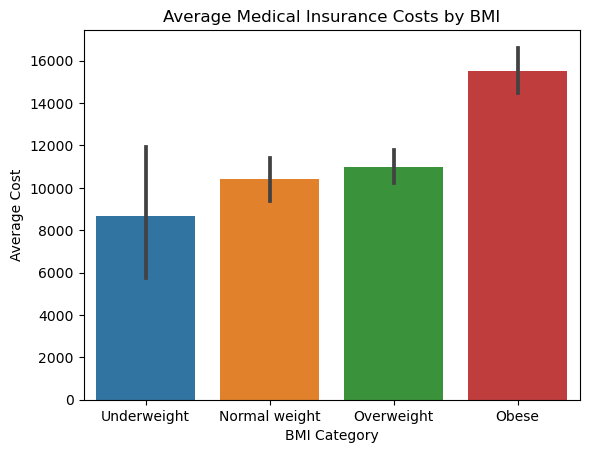

In [20]:
sns.barplot(x = 'bmi_category', y= 'charges', data = df)
plt.title('Average Medical Insurance Costs by BMI')
plt.xlabel('BMI Category')
plt.ylabel('Average Cost')

As BMI increases, the average cost of medical insurance increases. People who are classified as underweight have the lowest average medical insurance costs and people who are classified as obese have the highest average medical insurance costs. 

#### Testing for the significance of the differences in costs between BMI categories

__Null Hypothesis__: There is no difference in average medical insurance costs between BMI categories. <br>
__Alternative Hypothesis__: There is a difference in medical insurance costs between BMI categories.

In [21]:
bmi_underweight = df[df["bmi_category"] == "Underweight"]["charges"]
bmi_normal = df[df["bmi_category"] == "Normal weight"]["charges"]
bmi_overweight = df[df["bmi_category"] == "Overweight"]["charges"]
bmi_obese = df[df["bmi_category"] == "Obese"]["charges"]
f_stat, p_value = stats.f_oneway(bmi_underweight, bmi_normal, bmi_overweight, bmi_obese)

print (f'The f-statistic is: {f_stat}')
print (f'The p_value is: {p_value}')

The f-statistic is: 18.415786684176375
The p_value is: 1.0406468933933702e-11


The __p-value__ is 1.2664385334037939e-11, which is much smaller than 0.05. Therefore, we can conclude that there is strong evidence to reject the null hypothesis and conclude that there is a statistically significant difference in average medical costs between BMI categories.

### What role does sex play in determining insurance costs? Are there any significant differences between males and females?

To understand the relationship between sex and insurance costs, we will: 
- Compare average insurance cost between sexes
- Test for the significance of the difference in costs between the sexes

#### Comparing average medical insurance cost between sexes

In [22]:
sex_groups = pd.DataFrame(df.groupby("sex")["charges"].mean())
sex_groups.rename(columns={'charges': 'average_cost'}, inplace=True)
sex_groups['average_cost'] = sex_groups['average_cost'].map('${:,.2f}'.format)
sex_groups

,average_cost
sex,
female,"$12,569.58"
male,"$13,975.00"


Text(0.5, 0, 'Sex')

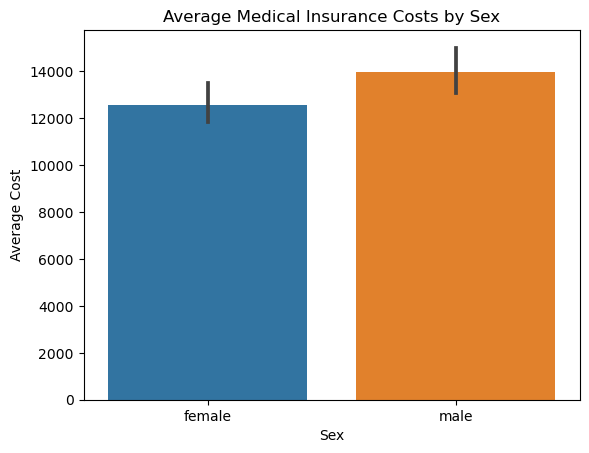

In [23]:
sns.barplot(x = 'sex', y= 'charges', data = df)
plt.title('Average Medical Insurance Costs by Sex')
plt.ylabel('Average Cost')
plt.xlabel('Sex')

On average, males have higher medical insurance costs than females.

#### Testing for the significance of the difference in costs between the sexes

__Null Hypothesis__: There is no difference in average medical insurance costs between sexes. <br>
__Alternative Hypothesis__: There is a difference in medical insurance costs between sexes.

In [24]:
male = df[df["sex"] == "male"]["charges"]
female = df[df["sex"] == "female"]["charges"]
t_stat, p_value = stats.ttest_ind(male, female)

print (f'The t-statistic is {t_stat}')
print (f'The p-value is {p_value}')

The t-statistic is 2.124391307062026
The p-value is 0.0338207919951195


Since the __p-value__ is less than the conventional significance level of 0.05, we will reject the null hypothesis and conclude that there is a statistically significant difference in charges between males and females.

### Does having children affect insurance costs? Is there a relationship between the number of children and insurance expenses?

To understand the relationship between the number of children and insurance costs, we will:

- Compare average insurance cost based on the number of children
- Test for the significance of the difference in costs based on the number of children 

#### Comparing average insurance cost based on the number of children

In [25]:
child_groups = pd.DataFrame (df.groupby('children')['charges'].mean())
child_groups.rename(columns={'charges': 'average_cost'}, inplace=True)
child_groups['average_cost'] = child_groups['average_cost'].map('${:,.2f}'.format)
child_groups

,average_cost
children,
0,"$12,384.70"
1,"$12,731.17"
2,"$15,073.56"
3,"$15,355.32"
4,"$13,850.66"
5,"$8,786.04"


Text(0.5, 0, 'Number of Children')

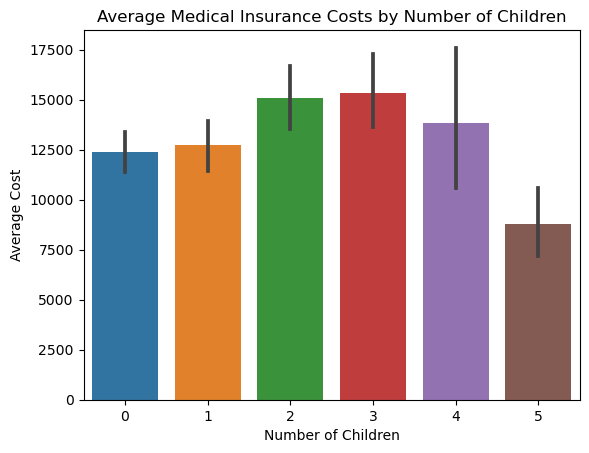

In [26]:
sns.barplot(x = 'children', y='charges', data = df)
plt.title('Average Medical Insurance Costs by Number of Children')
plt.ylabel('Average Cost')
plt.xlabel('Number of Children')

On average, people with 2 or 3 children have the highest medical insurance costs and people with 5 children have the lowest costs.

#### Testing for the significance of the difference in costs based on the number of children

__Null Hypothesis__: There is no difference in average medical insurance costs based on number of children. <br>
__Alternative Hypothesis__: There is a difference in medical insurance costs based on number of children.

In [27]:
group_0 = df[df['children'] == 0]['charges']
group_1 = df[df['children'] == 1]['charges']
group_2 = df[df['children'] == 2]['charges']
group_3 = df[df['children'] == 3]['charges']
group_4 = df[df['children'] == 4]['charges']
group_5 = df[df['children'] == 5]['charges']


f_stat, p_value = stats.f_oneway(group_0, group_1, group_2, group_3, group_4, group_5)

print (f'The f-statistic is: {f_stat}')
print (f'The p_value is: {p_value}')

The f-statistic is: 3.2687344101195737
The p_value is: 0.006133448188169501


The __p-value__ is 0.00578568138087587, which is less than 0.05. Therefore, we can conclude that there is strong evidence to reject the null hypothesis and conclude that there are significant differences in medical insurance costs based on the number of children.

### How does smoking status impact insurance premiums? Are smokers charged higher rates compared to non-smokers?

To understand the relationship between smoking status and insurance costs, we will:

- Compare average insurance cost based on smoking status
- Test for the significance of the difference in costs based on smoking status

#### Comparing average insurance cost based on smoking status

In [28]:
smoking_groups = pd.DataFrame(df.groupby('smoker')['charges'].mean())
smoking_groups.rename(columns={'charges': 'average_cost'}, inplace=True)
smoking_groups['average_cost'] = smoking_groups['average_cost'].map('${:,.2f}'.format) 
smoking_groups

,average_cost
smoker,
no,"$8,440.66"
yes,"$32,050.23"


Text(0, 0.5, 'Average Cost')

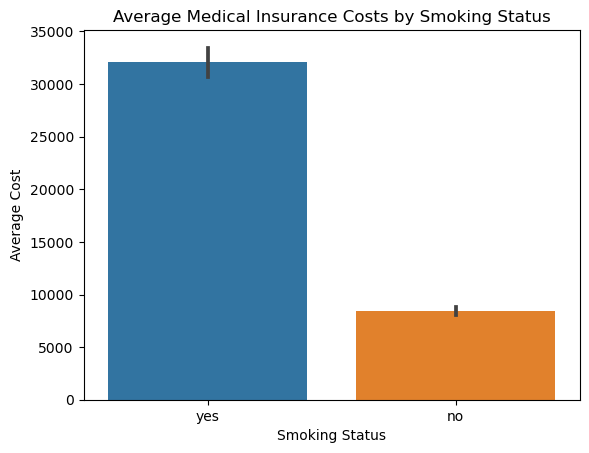

In [29]:
sns.barplot(x = 'smoker', y= 'charges', data = df)
plt.title('Average Medical Insurance Costs by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Cost')

On average, smokers have much higher medical insurance costs than non-smokers. 

#### Testing for the significance of the difference in costs based on smoking status

__Null Hypothesis__: There is no difference in average medical insurance costs based on smoking status.<br>
__Alternative Hypothesis__: There is a difference in medical insurance costs based on smoking.

In [30]:
smoker = df[df['smoker'] == 'yes']['charges']
non_smoker = df[df['smoker'] == 'no']['charges']
t_stat, p_value = stats.ttest_ind(smoker, non_smoker)

print (f'The t-statistic is {t_stat}')
print (f'The p-value is {p_value}')

The t-statistic is 46.64479459840305
The p-value is 1.4067220949376498e-282


The p-value is The p-value is __8.271435842179102e-283__, which is much smaller than 0.05. Therefore, we can conclude that there is strong evidence to reject the null hypothesis and conclude that there is a statistically significant difference in average medical costs between smokers and non-smokers. 

### Are there regional variations in insurance costs? Do different areas exhibit distinct pricing patterns?

To understand the relationship between region and insurance costs, we will:

- Compare average insurance cost based on region
- Test for the significance of the difference in costs based on region

#### Comparing average insurance cost based on region

In [31]:
region_groups = pd.DataFrame(df.groupby('region')['charges'].mean())
region_groups.rename(columns={'charges':'average_cost'}, inplace = True)
region_groups['average_cost'] = region_groups['average_cost'].map('${:,.2f}'.format) 
region_groups

,average_cost
region,
northeast,"$13,406.38"
northwest,"$12,450.84"
southeast,"$14,735.41"
southwest,"$12,346.94"


Text(0.5, 1.0, 'Charges per Region')

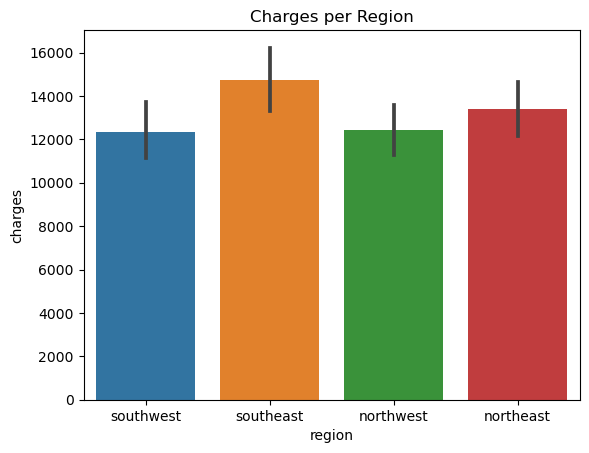

In [32]:
sns.barplot(x = 'region', y= 'charges', data = df)
plt.title('Charges per Region')

The region with the highest average cost is the SouthEast and the region with the lowest cost is the SouthWest.

#### Testing for the significance of the difference in costs based on region

__Null Hypothesis__: There is no difference in average medical insurance costs based on region.<br>
__Alternative Hypothesis__: There is a difference in medical insurance costs based on region.

In [33]:
southwest = df[df['region'] == 'southwest']['charges']
southeast = df[df['region'] == 'southeast']['charges']
northwest = df[df['region'] == 'northwest']['charges']
northeast = df[df['region'] == 'northeast']['charges']


f_statistic, p_value = stats.f_oneway(southwest, southeast, northwest, northeast)



print(f'The f statistic is: {f_statistic}')
print(f'The P-value is: {p_value}')

The f statistic is: 2.926139903662776
The P-value is: 0.03276288025444947


The __p-value__ is 0.0308933560705201, which is less than 0.05. Therefore, we can conclude that there is evidence to reject the null hypothesis and conclude that there are significant differences in medical insurance costs based on the region.

<hr style="border:1px solid black">

## Summary <a name="esummary"></a>

In this data analysis project, we explored a dataset containing information about individuals' sex, gender, age, number of children, BMI, smoking status, region, and the cost of their medical insurance. The goal was to gain insights into the factors influencing insurance costs and identify any patterns or trends within the data.

By analyzing the dataset, we found several significant findings. Firstly, age was found to have a noticeable impact on medical insurance costs, with statistically significant differences observed between different age groups. Secondly, there was a correlation between BMI and insurance costs, with higher BMI categories associated with higher average medical expenses. Sex was also found to play a role, as males had higher average insurance costs compared to females.

Furthermore, the number of children had an impact on insurance costs, with individuals having 2 or 3 children experiencing the highest costs, while those with 5 children had the lowest costs. Smoking status was another influential factor, as smokers were found to have higher medical insurance costs compared to non-smokers.

Lastly, regional variations were observed, with the Southeast region having the highest average insurance costs and the Southwest region having the lowest costs.

Overall, this analysis provides valuable insights into the relationships between various factors and medical insurance costs. These findings can be utilized by insurance providers, policymakers, and individuals to better understand the drivers of insurance expenses and potentially make informed decisions related to insurance coverage.